In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import cup_quasi_periodic_detection as cqpd

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib import interactive
%matplotlib notebook

In [2]:
sim0_pos = np.array([[0.3,0,0],
                     [0.3*np.cos(2*np.pi/3),0.5*np.sin(2*np.pi/3),0],
                     [0.3*np.cos(4*np.pi/3),0.5*np.sin(4*np.pi/3),0],
                     
                     [1,0,-.4],
                     [np.cos(2*np.pi/3),np.sin(2*np.pi/3),-.4],
                     [np.cos(4*np.pi/3),np.sin(4*np.pi/3),-.4],
                     
                     [1,0,.4],
                     [np.cos(2*np.pi/3),np.sin(2*np.pi/3),.4],
                     [np.cos(4*np.pi/3),np.sin(4*np.pi/3),.4]
                     
                     ], dtype=float)

sim0 = np.arange(len(sim0_pos))

In [3]:
# sim2 = np.array([
#     [0,3,4],
#     [3,6,7],
#     [0,1,6],
#     [0,1,4],
#     [3,4,7],
#     [1,6,7],
#     [1,4,5],
#     [4,7,8],
#     [1,2,7],
#     [1,2,5],
#     [4,5,8],
#     [2,7,8],
#     [2,3,5],
#     [5,6,8],
#     [0,2,8],
#     [0,2,3],
#     [3,5,6],
#     [0,6,8]
# ], dtype=int)

sim2 = np.array([
    [0,1,4],
    [0,3,4],
    [3,4,7],
    [3,6,7],
    [1,6,7],
    [0,1,6],
    
    [1,2,5],
    [1,4,5],
    [4,5,8],
    [4,7,8],
    [2,7,8],
    [1,2,7],
    
    [0,2,3],
    [2,3,5],
    [3,5,6],
    [5,6,8],
    [0,6,8],
    [0,2,8],
    
    [0,1,2]
], dtype=int)

filtrations_colors = [[i/(len(sim2)-1),0,1 - i/(len(sim2)-1),.7] for i in range(len(sim2))]

<IPython.core.display.Javascript object>


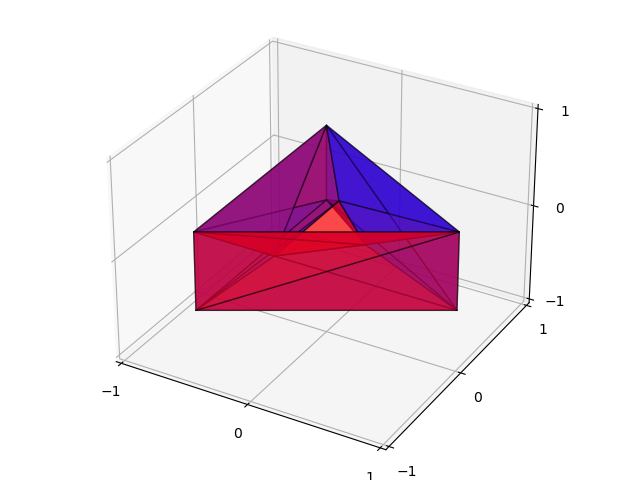

In [4]:
fig = plt.figure()
ax = Axes3D(fig)

verts = [sim0_pos[sim2[i]] for i in range(len(sim2))]

collection = Poly3DCollection(verts)
collection.set_facecolor(filtrations_colors)
collection.set_edgecolor([0,0,0,0.5])

ax.add_collection3d(collection)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
# plt.show()

plt.savefig('faces.png', bbox_inches='tight')

In [5]:
def get_1_skeleton(simplices_2):
    simplices_1 = []
    for sigma in simplices_2:
        
        faces = [list(p) for p in itertools.combinations(sigma,2)]
        
        simplices_1 += faces
        
        res = []
        [res.append(x) for x in simplices_1 if x not in res] 
        
        simplices_1 = res
        
    res = [] 
    [res.append(x) for x in simplices_1 if x not in res] 

    return np.array(res)

In [6]:
sim1 = get_1_skeleton(sim2)

filtrations_colors = [[0,1 - i/(len(sim1)-1),i/(len(sim1)-1),1] for i in range(len(sim1))]

<IPython.core.display.Javascript object>


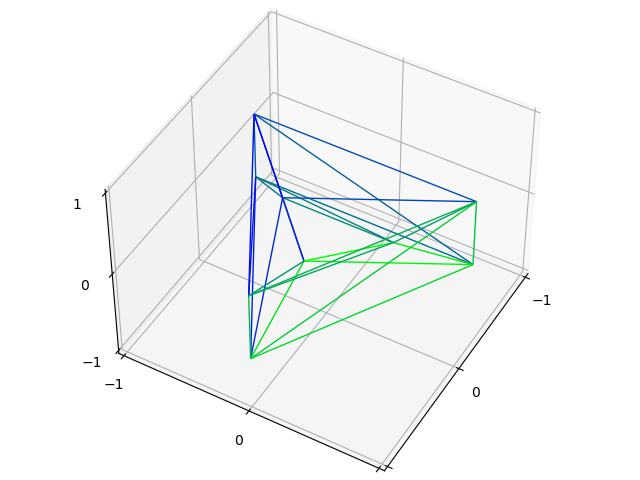

In [7]:
fig = plt.figure()
ax = Axes3D(fig)

verts = [sim0_pos[sim1[i]] for i in range(len(sim1))]

collection = Poly3DCollection(verts)
# collection.set_facecolor(filtrations_colors)
collection.set_edgecolor(filtrations_colors)

ax.add_collection3d(collection)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
# plt.show()

# rotate the axes and update
ax.view_init(45, 30)

K = {}
K['0'] = np.array(sim0)
K['1'] = np.array(sim1)
K['2'] = np.array(sim2)

plt.savefig('edges.png', bbox_inches='tight')

In [8]:
D0 = cqpd.delta_0(sim0, sim1)

In [9]:
D1 = cqpd.delta_1(sim1, sim2)

In [10]:
R0, V0, low0 = cqpd.matrix_reduction(D0)

In [11]:
R1, V1, low1 = cqpd.matrix_reduction(D1)

In [12]:
low0

array([10, 21, 19, 13, 25, 23, 14, 26, -1])

In [13]:
low1

array([ 2,  3,  4,  5,  6,  0,  8,  7,  9, 10, -1, 11, 12, -1, -1, 13, 14,
       -1, 15, -1, 16, -1, 17, -1, 18, -1, -1])

In [14]:
print(V1[:,17])
print(V1[:,5])

[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [15]:
np.array(V1[:,17], dtype=bool)
np.array(V1[:,5], dtype=bool)

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [16]:
cochain_1 = sim1[::-1][np.array(V1[:,17], dtype=bool)]

cochain_1 = np.column_stack((cochain_1, np.ones([len(cochain_1),1])))

print(cochain_1)

[[0. 8. 1.]
 [2. 8. 1.]
 [2. 7. 1.]
 [0. 6. 1.]
 [1. 7. 1.]
 [1. 6. 1.]]


In [17]:
cochain_2 = sim1[::-1][np.array(V1[:,5], dtype=bool)]

cochain_2 = np.column_stack((cochain_2, np.ones([len(cochain_2),1])))

print(cochain_2)

[[0. 8. 1.]
 [6. 8. 1.]
 [5. 6. 1.]
 [3. 5. 1.]
 [2. 3. 1.]
 [0. 2. 1.]]


In [18]:
cup = cqpd.cup_product_cochains(cochain_1, cochain_2, 2)
cup = np.array(cup)

In [19]:
cochain = np.zeros(sim2.shape[0])

for i in range(len(cup)):
    simplex = cup[i,:3]
    print(simplex)

    j = np.where((sim2 == simplex).all(axis=1))

    cochain[j] = cup[i,3]

cochain = cochain[::-1]

[0. 6. 8.]
[1. 6. 8.]


In [20]:
y, index = cqpd.backwards_substitution(R1, low1, cochain)

In [21]:
cochain

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [28]:
R1

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [22]:
index

1

In [23]:
sim2

array([[0, 1, 4],
       [0, 3, 4],
       [3, 4, 7],
       [3, 6, 7],
       [1, 6, 7],
       [0, 1, 6],
       [1, 2, 5],
       [1, 4, 5],
       [4, 5, 8],
       [4, 7, 8],
       [2, 7, 8],
       [1, 2, 7],
       [0, 2, 3],
       [2, 3, 5],
       [3, 5, 6],
       [5, 6, 8],
       [0, 6, 8],
       [0, 2, 8],
       [0, 1, 2]])

In [24]:
D0

array([[1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0.

In [25]:
R0

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0.

In [26]:
D0

array([[1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0.

In [27]:
V0

array([[1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])